#  Pallavi Yenigalla 2611733530

### 1. Supervised, Semi-Supervised, and Unsupervised Learning

#### (a) Download the Blood Transfusion Service Center Data Set from: https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center. This data has two output classes.Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

In [161]:
import pandas as pd
import numpy as np
from pandas import DataFrame
df=pd.read_csv("transfusion.data")
df=df.rename(columns = {'whether he/she donated blood in March 2007':'Blood', 'Recency(months)':'Recency','Frequency(times)':'Frequency','Monetary(c.c.blood)':'Monetary','Time(months)':'Time'})
len(df)

748

In [162]:
pos=df.loc[df['Blood']==1]
neg=df.loc[df['Blood']==0]
ptest=pos[:35]
ptrain=pos[35:]
ntest=neg[:114]
ntrain=neg[114:]
add=[ptrain,ntrain]
df_train=pd.concat(add)
add1=[ptest,ntest]
df_test=pd.concat(add1)
#print(len(df_train))
#print(len(df_test))


#### Training Data

In [163]:
# minmax normalising for traindata
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

df_train = shuffle(df_train)
b= df_train['Blood']
newdf=df_train.drop(["Blood"],axis=1)
scaler = MinMaxScaler()
print(scaler.fit(newdf))
new_df2=scaler.transform(newdf)
new_df=DataFrame(new_df2,columns=newdf.columns,index=newdf.index)
new_df['Blood']=b
new_df.head(5)

MinMaxScaler(copy=True, feature_range=(0, 1))


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Blood
526,0.027027,0.093023,0.093023,0.145833,1
262,0.027027,0.023256,0.023256,0.218750,0
638,0.148649,0.069767,0.069767,0.260417,0
213,0.054054,0.000000,0.000000,0.020833,0
274,0.054054,0.093023,0.093023,0.583333,0


#### Test Data

In [164]:
df_test=shuffle(df_test)
b= df_test['Blood']
newdf=df_test.drop(["Blood"],axis=1)
scaler = MinMaxScaler()
print( scaler.fit(newdf))
new_df1=scaler.transform(newdf)
new1_df=DataFrame(new_df1,columns=newdf.columns,index=newdf.index)

new1_df['Blood']=b
new1_df.head()

MinMaxScaler(copy=True, feature_range=(0, 1))


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Blood
173,0.153846,0.000000,0.000000,0.000000,0
183,0.307692,0.224490,0.224490,0.895833,0
58,0.153846,0.306122,0.306122,0.822917,0
43,0.153846,0.081633,0.081633,0.145833,0
134,0.153846,0.204082,0.204082,0.895833,0


In [165]:
ytrain=new_df[["Blood"]]
#y.head()
Xtrain=new_df.drop(["Blood"],axis=1)
Xtrain.head()
#ytrain

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
526,0.027027,0.093023,0.093023,0.145833
262,0.027027,0.023256,0.023256,0.218750
638,0.148649,0.069767,0.069767,0.260417
213,0.054054,0.000000,0.000000,0.020833
274,0.054054,0.093023,0.093023,0.583333


In [166]:
ytest=new1_df[["Blood"]]
#y.head()
Xtest=new1_df.drop(["Blood"],axis=1)
Xtest.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
173,0.153846,0.000000,0.000000,0.000000
183,0.307692,0.224490,0.224490,0.895833
58,0.153846,0.306122,0.306122,0.822917
43,0.153846,0.081633,0.081633,0.145833
134,0.153846,0.204082,0.204082,0.895833


### (b) Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the accuracy, AUC, ROC, and confusion matrix for both training and test sets.
We claculate the penalty parameter and the accuracy score

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
clf = LinearSVC(penalty='l1', dual=False)
# parameters={'C':[0.1,0.01,0.001,0.0001,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,10,100,200,300,400,500,600,800,1000,10000]}
parameters = { 'C' : np.logspace(-2,2,5)}

grid=GridSearchCV(clf,param_grid=parameters,cv=5)
grid.fit(Xtrain,ytrain['Blood'])

predicted=grid.predict(Xtest)
d=DataFrame(grid.cv_results_)
#d
print(grid.best_params_)
a=accuracy_score(ytest['Blood'],predicted)
print(a)


{'C': 1.0}
0.771812080537


C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\

#### Plottinng confusion matrix for the training set

In [75]:
def plotConfusionMatrix(cm):
    class_names = np.array([0,1])

    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    # Compute confusion matrix
    cnf_matrix = cm
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

Confusion matrix, without normalization
[[112   2]
 [ 32   3]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.91  0.09]]


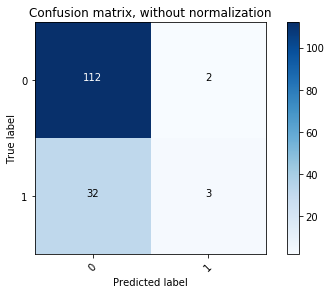

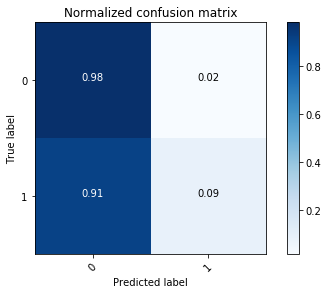

In [83]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm=confusion_matrix(ytest,predicted)

plotConfusionMatrix(cm)
#plotConfusionMatrix(cm1)


#### Plotting ROC curve for the training set

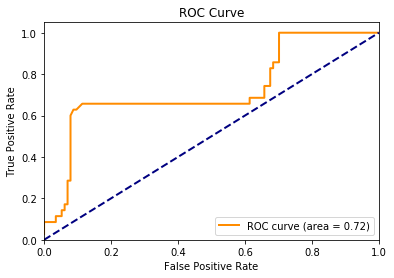

In [84]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
def plot_roc_curve(y_true, y_predict_scores, charname):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    #for i in range(n_classes):
    fpr[2], tpr[2], _ = roc_curve(y_true, y_predict_scores, drop_intermediate=False)
    roc_auc[2] = auc(fpr[2], tpr[2])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_predict_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(charname)
    plt.legend(loc="lower right")
    plt.savefig(charname)
plt.close()
plot_roc_curve(ytest["Blood"],grid.decision_function(Xtest),'ROC Curve')

plt.show()

#### 1b for the test set.
We find the penalty parameter and the accuracy score for the test data

In [85]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
clf = LinearSVC(penalty='l1', dual=False)
# parameters={'C':[0.1,0.01,0.001,0.0001,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,10,100,200,300,400,500,600,800,1000,10000]}
parameters = { 'C' : np.logspace(-2,2,5)}

grid=GridSearchCV(clf,param_grid=parameters,cv=5)
grid.fit(Xtest,ytest)
predicted=grid.predict(Xtrain)
d=DataFrame(grid.cv_results_)
#d
print(grid.best_params_)
a=accuracy_score(ytrain,predicted)
print(a)

{'C': 10.0}
0.761268781302


C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

#### Confusion matrix and ROC curve for the test data

Confusion matrix, without normalization
[[438  18]
 [125  18]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.87  0.13]]


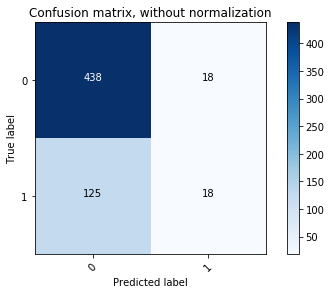

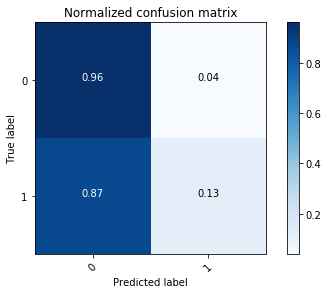

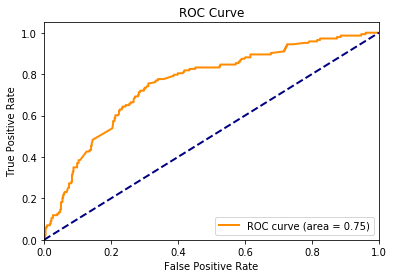

In [86]:
cm=confusion_matrix(ytrain,predicted)
plotConfusionMatrix(cm)
plot_roc_curve(ytrain["Blood"],grid.decision_function(Xtrain),'ROC Curve')
plt.show()


#### (c) Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

#### selecting 5-% of positive and negative class as labelled and the rest as unlabelled data

In [140]:
positiveData = new_df.loc[df['Blood']==1]
negativeData = new_df.loc[df['Blood']==0]
print(len(positiveData))
print(len(negativeData))

143
456


In [141]:
positiveData = new_df.loc[df['Blood']==1]
negativeData = new_df.loc[df['Blood']==0]
posLabel=positiveData.sample(n=71)
posUnlabel=positiveData.loc[~positiveData.index.isin(posLabel.index)]
negLabel=negativeData.sample(n=228)
negUnlabel=negativeData.loc[~negativeData.index.isin(negLabel.index)]
f = [posLabel,negLabel]
label_df = pd.concat(f)
#label_df = train_df.sample(frac=1)
f1 = [posUnlabel,negUnlabel]
unlabel_df = pd.concat(f1)
#unlabel_df = test_df.sample(frac=1)
#print(len(label_df))
#print(len(unlabel_df))


In [142]:
y_train=label_df[["Blood"]]
X_train=label_df.drop(["Blood"],axis=1)
y_test=unlabel_df[["Blood"]]
X_test=unlabel_df.drop(["Blood"],axis=1)
#y_test.head()

#### i. Train an L1-penalized SVM to classify the labeled data. Choose the penalty parameter using 5 fold cross validation. 

In [143]:
clf = LinearSVC(penalty='l1', dual=False)
parameters={'C':[0.1,0.01,0.001,0.0001,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,10,100,200,300,400,500,600,800,1000,10000]}

grid=GridSearchCV(clf,parameters,cv=5)
grid.fit(X_train,y_train)
d=DataFrame(grid.cv_results_)
#d
print(grid.best_params_)

C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'C': 10}


C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

#### ii. Find the unlabeled data point that is the closest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and report the accuracy, AUC, ROC, and confusion matrix for the test set.

In [144]:
length=unlabel_df.shape[0]
for i in range(0,length):
   
    prediction=grid.predict(X_test)
    print(len(prediction))
    distance=grid.decision_function(X_test)
    dis=abs(distance)
    #print(dis)
    dist=dis.argsort()[:1]
    closest_dataframe = X_test.iloc[dist]
    print('closest_dataframe: ',closest_dataframe)

    closest_true_label = y_test.iloc[dist]
    svm_pred = prediction[dist]
    
    X_train=X_train.append(closest_dataframe)
    y_train=y_train.append(closest_true_label)
    y_train.iloc[-1]=svm_pred 

    X_test = X_test.drop(X_test.index[dist])
    y_test = y_test.drop(y_test.index[dist])

    




300
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
538          0.027027           0.162791               0.162791          0.375
299
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
510          0.054054           0.069767               0.069767       0.020833
298
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
525          0.027027           0.069767               0.069767        0.09375
297
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
534          0.027027           0.116279               0.116279           0.25
296
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
537          0.027027           0.116279               0.116279           0.25
295
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  T

237
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
610          0.054054                0.0                    0.0       0.020833
236
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
226          0.054054                0.0                    0.0       0.020833
235
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
618          0.054054                0.0                    0.0       0.020833
234
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
215          0.054054                0.0                    0.0       0.020833
233
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
230          0.054054                0.0                    0.0       0.020833
232
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  T

closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
257          0.148649           0.139535               0.139535       0.364583
183
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
247          0.094595           0.255814               0.255814          0.875
182
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
291          0.216216           0.255814               0.255814            0.5
181
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
234          0.189189           0.139535               0.139535           0.25
180
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
320          0.202703           0.348837               0.348837       0.833333
179
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time 

125
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
299          0.189189           0.023256               0.023256          0.125
124
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
318          0.148649           0.186047               0.186047       0.729167
123
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
306          0.054054           0.093023               0.093023           0.75
122
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
654          0.189189           0.046512               0.046512       0.197917
121
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
680           0.27027           0.302326               0.302326       0.697917
120
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  T

closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
695           0.22973           0.139535               0.139535       0.583333
70
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
504               0.0           0.581395               0.581395       0.770833
69
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
400          0.243243           0.023256               0.023256        0.21875
68
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
686          0.175676           0.139535               0.139535       0.770833
67
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
698          0.216216           0.139535               0.139535       0.645833
66
closest_dataframe:       Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (mont

#### Confusion matrix and ROC curve for c ii

C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.771812080537
Confusion matrix, without normalization
[[114   0]
 [ 34   1]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.97  0.03]]


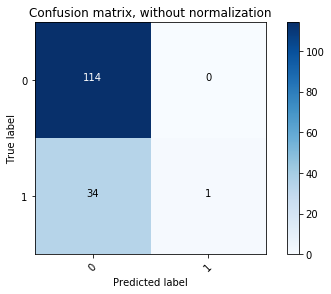

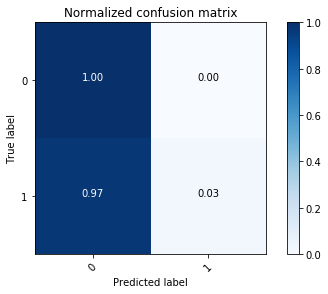

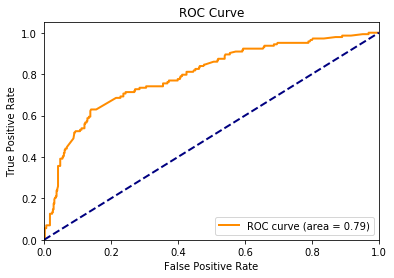

In [125]:
grid.fit(X_train,y_train)
pred=grid.predict(Xtest)
acc=accuracy_score(ytest,pred)
print(acc)
cm=confusion_matrix(ytest,pred)
plotConfusionMatrix(cm)
plot_roc_curve(ytrain["Blood"],grid.decision_function(Xtrain),'ROC Curve')
plt.show()


#### (d) Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.


In [274]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2, random_state=0).fit(Xtrain)
print(kmeans)
predict=kmeans.predict(Xtest)
acc=accuracy_score(ytest,predict)
print(acc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
0.637583892617


#### i. Run the k-means algorithm multiple times. How do you make sure that the algorithm was not trapped in a local minimum?

#### A way to avoid local minima is by by setting n_init = 100 is to run K-means multiple times and then  choosing the run that gives the lowest error. If we run this k^n times and then choose the best out of that, then you would be guaranteed of finding a global minima, which can be time consuming.

In [275]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,n_init=200, random_state=0).fit(Xtrain)
print(kmeans)
predict=kmeans.predict(Xtest)
acc=accuracy_score(ytest,predict)
print(acc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=200, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
0.637583892617


#### ii. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by kmeans with the true labels of the training data and report accuracy and the confusion matrix.1


In [191]:
kmeans=KMeans(n_clusters=2).fit(Xtrain)
print(kmeans)
print(kmeans.cluster_centers_)
kmeans.transform(Xtrain)
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=30)
neigh.fit(Xtrain) 
p=neigh.kneighbors([[0.15, 0.04, 0.04,0.2]])
print(p)
neigh1 = NearestNeighbors(n_neighbors=30)
neigh1.fit(Xtrain) 
q=neigh.kneighbors([[0.16, 0.19, 0.19,0.65]])
print(q)




KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[ 0.15  0.05  0.05  0.2 ]
 [ 0.16  0.19  0.19  0.65]]
(array([[ 0.02,  0.02,  0.02,  0.02,  0.04,  0.04,  0.05,  0.05,  0.05,
         0.05,  0.05,  0.05,  0.05,  0.06,  0.06,  0.06,  0.06,  0.06,
         0.06,  0.06,  0.06,  0.07,  0.07,  0.07,  0.07,  0.07,  0.07,
         0.07,  0.07,  0.07]]), array([[494, 433, 161, 466, 467, 576, 493, 367,  46, 395,  92, 549, 149,
        150,  28, 303, 527, 444, 141, 223, 232, 380, 200, 578, 142, 234,
        270, 375, 215, 256]], dtype=int64))
(array([[ 0.05,  0.05,  0.06,  0.07,  0.07,  0.08,  0.08,  0.08,  0.09,
         0.09,  0.11,  0.11,  0.12,  0.12,  0.12,  0.12,  0.12,  0.12,
         0.13,  0.13,  0.13,  0.14,  0.14,  0.14,  0.14,  0.14,  0.14,
         0.14,  0.14,  0.14]]), array([[ 24, 416,  60, 500, 391, 348, 310, 135, 266, 227, 540, 430, 555,
      

In [240]:
first_center=Xtrain.iloc[[494, 433, 161, 466, 467, 576, 493, 367,  46, 395,  92, 549, 149,
        150,  28, 303, 527, 444, 141, 223, 232, 380, 200, 578, 142, 234,270, 375, 215, 256],:]
second_center=Xtrain.iloc[[ 24, 416,  60, 500, 391, 348, 310, 135, 266, 227, 540, 430, 555,
        176, 237, 389, 596,  42,  90, 165, 503, 245, 504, 260,  32, 357,
        114, 204, 131, 441],:]
true_first_center=ytrain.iloc[[494, 433, 161, 466, 467, 576, 493, 367,  46, 395,  92, 549, 149,
        150,  28, 303, 527, 444, 141, 223, 232, 380, 200, 578, 142, 234,270, 375, 215, 256],:]
true_second_center=ytrain.iloc[[ 24, 416,  60, 500, 391, 348, 310, 135, 266, 227, 540, 430, 555,
        176, 237, 389, 596,  42,  90, 165, 503, 245, 504, 260,  32, 357,
        114, 204, 131, 441],:]


In [231]:
true_first_center['Blood'].value_counts()


0    22
1     8
Name: Blood, dtype: int64

In [232]:
true_second_center['Blood'].value_counts()

0    24
1     6
Name: Blood, dtype: int64

0.577629382304
Confusion matrix, without normalization
[[426  30]
 [137   6]]
Normalized confusion matrix
[[ 0.93  0.07]
 [ 0.96  0.04]]


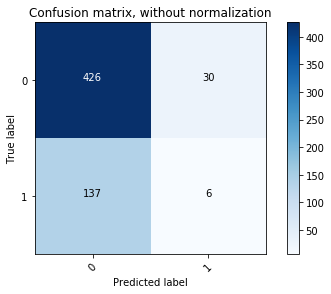

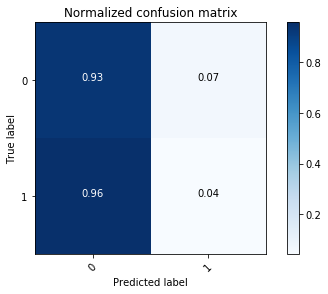

In [241]:
predict=kmeans.predict(Xtrain)
acc=accuracy_score(ytrain,predict)
print(acc)
cm=confusion_matrix(ytrain,predict)
plotConfusionMatrix(cm)

#### iii. Classify test data based on their proximity to the centers of the clusters. Report accuracy and confusion matrix for the test data.

In [245]:
kmeans=KMeans(n_clusters=2).fit(Xtest)
print(kmeans)
print(kmeans.cluster_centers_)
clusters=kmeans.labels_
index0 = np.argwhere(clusters == 0)
index1 = np.argwhere(clusters == 1)

# from sklearn.neighbors import NearestNeighbors
# neigh = NearestNeighbors(n_neighbors=30)
# neigh.fit(Xtrain)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[ 0.24  0.07  0.07  0.15]
 [ 0.22  0.29  0.29  0.66]]


In [257]:
first=pd.DataFrame(columns=Xtest.columns)
first=Xtest.iloc[index0]


In [268]:
second=pd.DataFrame(columns=Xtest.columns)
second=Xtest.iloc[index1]

In [270]:
first_true=ytest.iloc[index0]
second_true=ytest.iloc[index1]

In [272]:
print(first_true['Blood'].value_counts())
print(second_true['Blood'].value_counts())

0    84
1    23
Name: Blood, dtype: int64
0    30
1    12
Name: Blood, dtype: int64


0.644295302013
Confusion matrix, without normalization
[[84 30]
 [23 12]]
Normalized confusion matrix
[[ 0.74  0.26]
 [ 0.66  0.34]]


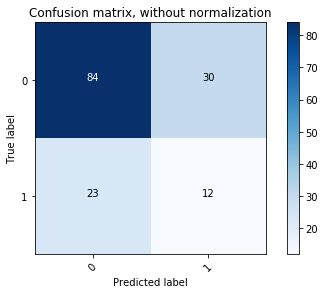

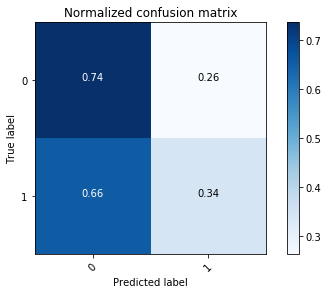

In [273]:
predict=kmeans.predict(Xtest)
acc=accuracy_score(ytest,predict)
print(acc)
cm=confusion_matrix(ytest,predict)
plotConfusionMatrix(cm)

#### (f) One expects that supervised learning on the full data set works better than semisupervised learning with half of the data set labeled.One expects that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

In [ ]:
From the above we see that the unsupervised learning by kmeans is a very bad model, since it predicts both the classes as 0.
The accuracy score and ROC curve values are less as compared to supervised learning.
Semi supervised learning has been done with 50% positive data and 50% negative data from the trainging dataset obtained originally.
This is evident through the accuracy score and roc obtained from the model.
We find that the supervised learning applied on the entire dataset works best out of the given three models.

